In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df_stats = pd.read_excel("tournament_statistics.xlsx", sheet_name="Pokemon_Stats")
df_moves = pd.read_excel("tournament_statistics.xlsx", sheet_name="Metronome_Data_Complete")
df_pkmn = pd.read_excel("tournament_statistics.xlsx", sheet_name="Pokemon_Data_Complete")
df_team = pd.read_excel("tournament_statistics.xlsx", sheet_name="Team_Data_Complete")
# Without Dragon-type
colorset1 = ["#92D050", "#4D4D4D", "#FFFF00", "#C00000", "#FF0000", "#BDD7EE", "#34397A", "#00FF00", "#FFD966", "#66FFFF", "#E7E6E6", "#7030A0", "#FF66CC", "#CC9900", "#A6A6A6", "#0070C0"]
# With Dragon-type
colorset2 = ["#92D050", "#4D4D4D", "#9933FF", "#FFFF00", "#C00000", "#FF0000", "#BDD7EE", "#34397A", "#00FF00", "#FFD966", "#66FFFF", "#E7E6E6", "#7030A0", "#FF66CC", "#CC9900", "#A6A6A6", "#0070C0"]

Display average stat total for all pokemon in each team

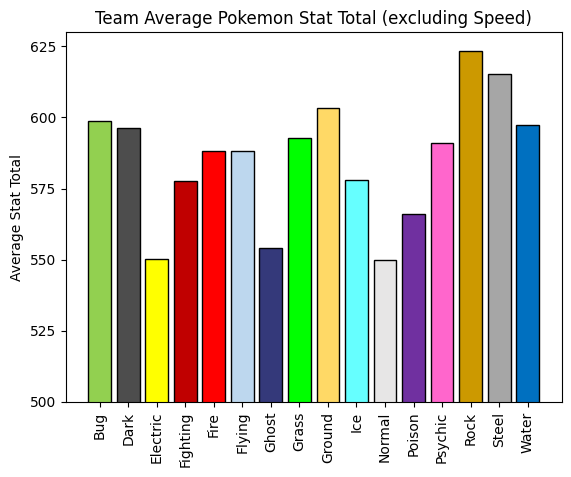

In [172]:
# Get the average pokemon stat total per team 
df_group = df_stats.groupby('Team')['Total'].mean().reset_index()
# Display in vertical bar graph using Matplotlib
plt.bar(df_group['Team'], df_group['Total'], color=colorset1, edgecolor='black')
plt.title('Team Average Pokemon Stat Total (excluding Speed)')
plt.xlabel('')
plt.ylabel('Average Stat Total')
plt.xticks(rotation=90)
plt.ylim(500, 630)
plt.yticks(range(500, 630, 25))
plt.show()
# Display in vertical bar graph using Plotly
fig = px.bar(df_group, x='Team', y='Total')
fig.update_layout(title='Team Average Pokemon Stat Total (excluding Speed)', xaxis_title='', yaxis_title='Average Stat Total')
fig.update_yaxes(range=[500, 630], dtick=25)
fig.update_traces(marker=dict(color=colorset1), marker_line_color='black', marker_line_width=1)
fig.show()

Display percentage of attacking moves used for every type

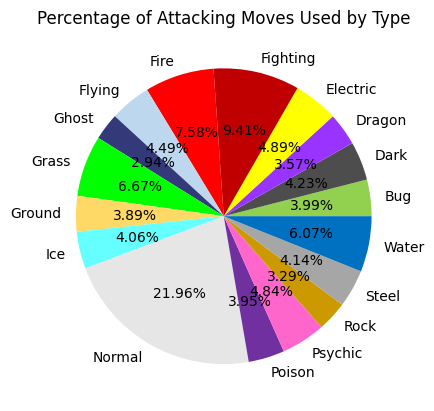

In [105]:
# Get the total usage of all attacking moves for each type
df_group = df_moves[(df_moves['Category'] == 'Physical') | (df_moves['Category'] == 'Special')].groupby("Type")["Usage"].sum().reset_index()
# Display in pie chart using Matplotlib
plt.pie(df_group['Usage'], labels=df_group['Type'], autopct="%1.2f%%", colors=colorset2) # wedgeprops={'edgecolor': 'black'}
plt.title('Percentage of Attacking Moves Used by Type')
plt.show()
# Display in pie chart using Plotly
sorted_labels = sorted(df_group['Type'])
fig = px.pie(df_group, values='Usage', names='Type', category_orders={'Type': sorted_labels})
fig.update_layout(title="Percentage of Attacking Moves Used by Type")
fig.update_traces(
    marker=dict(colors=colorset2), marker_line_color='black', marker_line_width=1, 
    textposition='outside', textinfo='label+percent', 
    showlegend=False
)
fig.show()

Display top moves used by Metronome

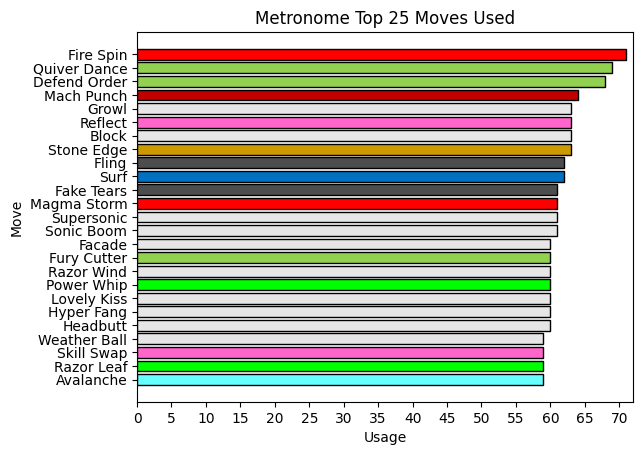

In [247]:
# Get every move, its type, and usage called by Metronome
df_group = df_moves.groupby(['Move', 'Type'])['Usage'].sum().reset_index()
df_group = df_group.sort_values('Usage', ascending=True).tail(25)
df_type = df_moves.groupby('Type')['Usage'].count().reset_index()
# Display in horizontal bar graph using Matplotlib
type_color_mapping = {move_type: color for move_type, color in zip(df_type['Type'].unique(), colorset2)}
plt.barh(df_group['Move'], df_group['Usage'], color=[type_color_mapping[move_type] for move_type in df_group['Type']], edgecolor='black')
plt.title('Metronome Top 25 Moves Used')
plt.xlabel('Usage')
plt.ylabel('Move')
plt.xlim(0, df_group['Usage'].max() + 1)
plt.xticks(range(0, df_group['Usage'].max() + 1, 5))
plt.show()
# Display in horizontal bar graph using Plotly
fig = px.bar(df_group, x='Usage', y='Move', orientation='h')
fig.update_layout(title='Metronome Top 25 Moves Used', xaxis_title='Usage', yaxis_title='Move', height=600)
fig.update_xaxes(dtick=5)
fig.update_traces(marker=dict(color=[type_color_mapping[type_] for type_ in df_group['Type']]),
    marker_line_color='black', marker_line_width=1)
fig.show()

Display move distribution

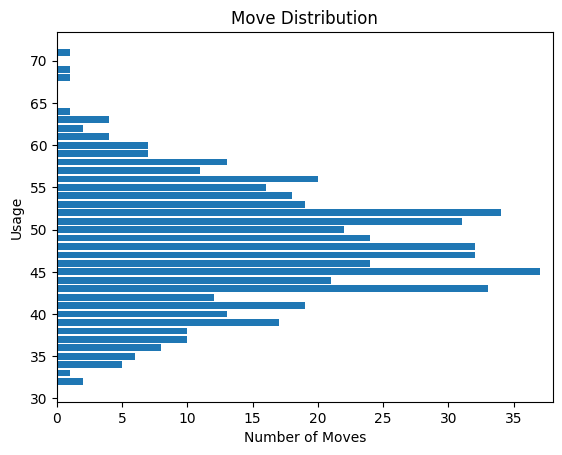

In [198]:
# Get move usage spread of every move called by Metronome
df_group = df_moves.groupby('Usage')['Move'].count().reset_index()
# Display in horizontal bar graph using Matplotlib
plt.barh(df_group['Usage'], df_group['Move'])
plt.title('Move Distribution')
plt.xlabel('Number of Moves')
plt.ylabel('Usage')
plt.xlim(0, df_group['Move'].max() + 1)
plt.xticks(range(0, df_group['Move'].max() + 1, 5))
plt.show()
# Display in horizontal bar graph using Plotly
fig = px.bar(df_group, x='Move', y='Usage', orientation='h')
fig.update_layout(title='Move Distribution', xaxis_title='Number of Moves', yaxis_title='Usage')
fig.update_yaxes(range=[30, df_group['Usage'].max() + 1])
fig.show()

Display total defeats/faints per team

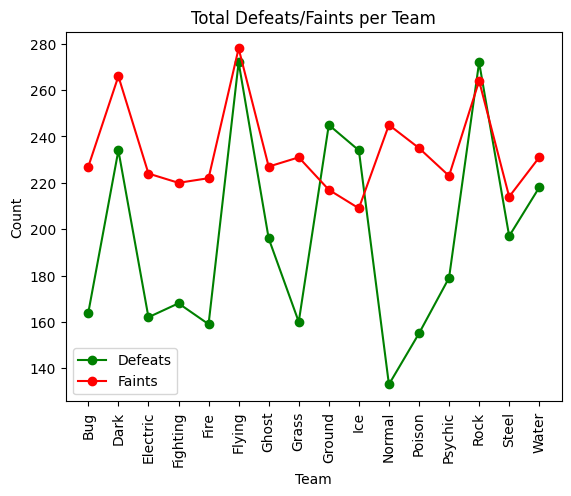

In [236]:
# Get total defeats/faints from each team
df_group = df_pkmn.groupby('Team').agg(
    Defeats=('Defeats', 'sum'),
    Faints=('Faints', 'sum')
).reset_index()
# Display in line graph using Matplotlib
plt.plot(df_group['Team'], df_group['Defeats'], color='green', label='Defeats', marker='o')
plt.plot(df_group['Team'], df_group['Faints'], color='red', label='Faints', marker='o')
plt.title('Total Defeats/Faints per Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()
# Display in line graph using Plotly
fig = px.line(df_group, x='Team', y=['Defeats', 'Faints'], 
              color_discrete_map={'Defeats': 'green', 'Faints': 'red'}, 
              markers=True)
# Set labels and title
fig.update_layout(title='Total Defeats/Faints per Team', xaxis_title='Team', yaxis_title='Count')
fig.show()

Display average damage given/taken per team

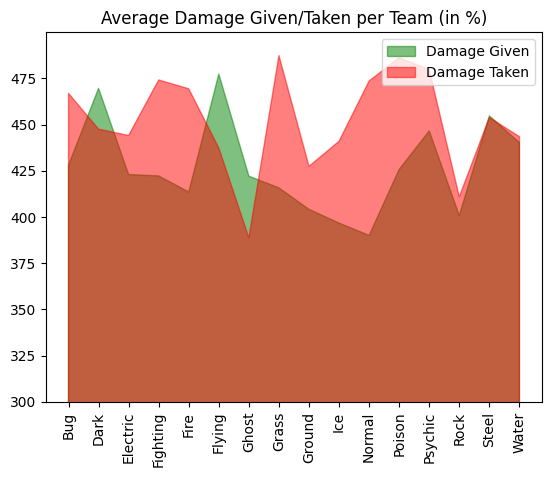

In [246]:
# Get average damage given/taken for each team
df_group = df_pkmn.groupby('Team').agg(
    Damage_Given=('Damage Given (in %)', 'sum'),
    Damage_Taken=('Damage Taken (in %)', 'sum'),
    Games=('Games Played', 'max')
).reset_index()
df_group['Damage Given (in %)'] = df_group['Damage_Given'] / df_group['Games']
df_group['Damage Taken (in %)'] = df_group['Damage_Taken'] / df_group['Games']
# Display in area graph using Matplotlib
fig, ax = plt.subplots()
ax.fill_between(df_group['Team'], df_group['Damage Given (in %)'], color='green', alpha=0.5, label='Damage Given')
ax.fill_between(df_group['Team'], df_group['Damage Taken (in %)'], color='red', alpha=0.5, label='Damage Taken')
ax.set_title('Average Damage Given/Taken per Team (in %)')
ax.legend()
plt.xticks(rotation=90)
plt.ylim(300, 500)
plt.yticks(range(300, 500, 25))
plt.show()

# Display in area graph using Plotly
damage_given = go.Scatter(x=df_group['Team'], y=df_group['Damage Given (in %)'], name='Damage Given', line=dict(color='green'), fill='tozeroy')
damage_taken = go.Scatter(x=df_group['Team'], y=df_group['Damage Taken (in %)'], name='Damage Taken', line=dict(color='red'), fill='tozeroy')
layout = go.Layout(
    title='Average Damage Given/Taken per Team (in %)',
    xaxis=dict(title=''),
    yaxis=dict(title='')
)
fig = go.Figure(data=[damage_given, damage_taken], layout=layout)
fig.update_yaxes(range=[300,500], dtick=25)
fig.show()

Display team win percentages

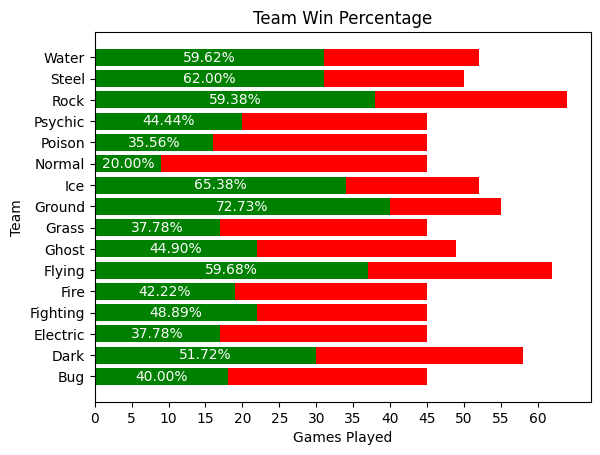

In [300]:
# Get win/loss record of each team & calculate win percentage
df_group = df_team.groupby('Team').agg(
    Games_Won=('Games Won', 'sum'),
    Games_Lost=('Games Lost', 'sum'),
    Games_Played=('Games Played', 'sum')
).reset_index()
df_group['Win_Percentage'] = df_group['Games_Won'] / df_group['Games_Played']
# Display in 100% bar graph using Matplotlib
plt.barh(df_group['Team'], df_group['Games_Played'], color='red', label='Games Lost')
plt.barh(df_group['Team'], df_group['Games_Won'], color='green', label='Games Won')
for index, row in df_group.iterrows():
    win_percentage = row['Win_Percentage']
    games_won = row['Games_Won']
    plt.text(games_won / 2, index, f'{(win_percentage*100):.2f}%', ha='center', va='center', color='white')
plt.xticks(range(0, df_group['Games_Played'].max(), 5))
plt.title('Team Win Percentage')
plt.xlabel('Games Played')
plt.ylabel('Team')
plt.show()
# Display in 100% bar graph using Plotly
fig = px.bar(df_group, x=['Games_Won', 'Games_Lost'], y='Team', orientation='h',
    color_discrete_sequence=['green', 'red'],
    title='Team Win Percentage',
    # labels={'x': 'Games Played', 'y': 'Team'}
    )
for index, row in df_group.iterrows():
    win_percentage = row['Win_Percentage']
    games_won = row['Games_Won']
    fig.add_annotation(
        x=games_won / 2,
        y=row['Team'],
        text=f'{(win_percentage * 100):.2f}%',
        showarrow=False,
        font=dict(color='white'),
        align='center',
        valign='middle'
    )
fig.update_layout(xaxis_title='Games Played')
fig.update_xaxes(dtick=5)
fig.update_traces(showlegend=False)
fig.show()

Display average turns per game

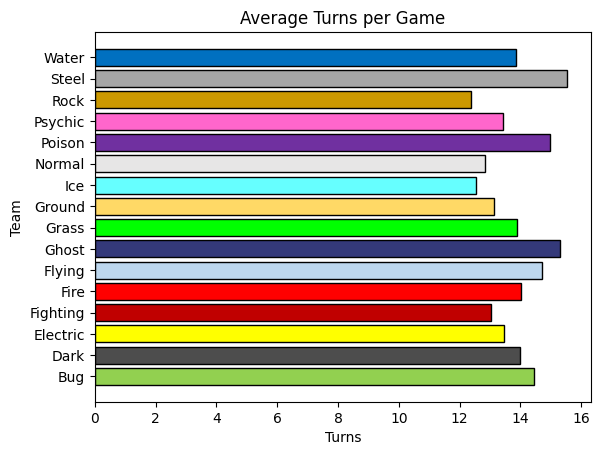

In [312]:
# Get the average turns per game for each team
df_group = df_team.groupby('Team').agg(
    Turns_Played=('Turns Played', 'sum'),
    Games_Played=('Games Played', 'sum')
).reset_index()
df_group['Turns_Per_Game'] = df_group['Turns_Played'] / df_group['Games_Played']
# Display in horizontal bar graph using Matplotlib
plt.barh(df_group['Team'], df_group['Turns_Per_Game'], color=colorset1, edgecolor='black')
plt.title('Average Turns per Game')
plt.xlabel('Turns')
plt.ylabel('Team')
plt.show()
# Display in horizontal bar graph using Plotly
fig = px.bar(df_group, x='Turns_Per_Game', y='Team', orientation='h')
fig.update_layout(
    title='Average Turns per Game', 
    xaxis_title='Turns', 
    yaxis_title='Team'
)
fig.update_traces(
    marker=dict(color=colorset1),
    marker_line_color='black', 
    marker_line_width=1
)
fig.show()